# Projeto 1 - Ciencia dos Dados 

Michel Jose Moraes - Engenharia 2A

# Introdução

Para iniciar o projeto, os dados foram retirados do site Gapminder.org/tools. 

In [142]:
#definindo nosso DataBase:

#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#variaveis:
dadoshdi = pd.read_excel('hdi.xlsx') #IDH dos países
dadoscpw = pd.read_excel('cpw.xlsx') #Crianças por mulher dos países
dadosgirls = pd.read_excel('girlsboys.xlsx') #Meninas por menino nas escolas dos países

#pegando dados do ano 2000:
hdi2000=dadoshdi.loc[:,["geo", 2000]]
cpw2000=dadoscpw.loc[:,["geo", 2000]]
girls2000=dadosgirls.loc[:,["geo", 2000]]

#renomeando:
hdi2000 = hdi2000.set_index('geo')
cpw2000 = cpw2000.set_index('geo')
girls2000 = girls2000.set_index('geo')

Unindo os 3 dados, obtemos o nosso DataFrame, com base no ano 2000.

In [143]:
#Juntando os 3 dados:

data = hdi2000.join(cpw2000, how='inner', lsuffix='_hdi', rsuffix='_cpw')
data = data.join(girls2000, how='inner')

#renomeando as colunas:
data['HDI'] = data.pop('2000_hdi')
data['Cpw'] = data.pop('2000_cpw')
data['Girls/boys(school)'] = data.pop(2000)

Assim conseguimos nossa DataBase:

In [144]:
data = data.dropna(axis= "index" )
data

,HDI,Cpw,Girls/boys(school)
geo,,,
Albania,0.662,2.16,0.963
Algeria,0.644,2.51,0.964
Argentina,0.771,2.56,1.020
Armenia,0.644,1.30,1.070
Austria,0.837,1.37,0.970
Bahrain,0.794,2.77,1.030
Barbados,0.750,1.74,1.010
Belgium,0.873,1.63,1.060
Belize,0.677,3.60,0.985


# O quanto a igualdade de gênero nas escolas influencia, ou é influenciada pelo IDH de um país?

A ánalise à ser feita sobre os dados de número de bebes por mulher em um país, e taxa de mulher por homem nas escolas recebeu, como base, o ano 2000. 

# Ánalise

# Gráfico 1

 Primeiro, no gráfico abaixo, pode-se perceber se o número de meninas por meninos na escola é influenciado pelo idh. Para isso, foi utilizado um gráfico de disperção, por se tratar de duas variaveis quantitativas.

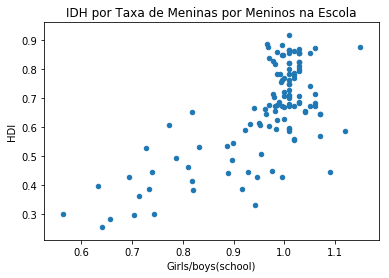

In [145]:
data.plot.scatter(y="HDI", x = "Girls/boys(school)", title="IDH por Taxa de Meninas por Meninos na Escola")

Ao analisar o gráfico 1, pode-se notar que os países com a taxa de meninas por meninos na escola é mais próxima de 1, ou seja, número semelhante de meninos e meninas na escola, possuem um IDH, em geral, mais elevado do que os países com uma notável diferença de estudos entre os gêneros.

A diferença total da população masculina e feminina não é igual em todos os países, e por isso, e outros fatores, existe uma taxa de erro nesta análise para alguns países. Porém poucos países com uma alta desigualdade entre gêneros estudando possuem um IDH elevado, enquanto os que não possuem, estão agrupados nas faixas de IDH médio, e alto.

Podemos imaginar, então, que quanto mais as mulheres estudam e, muitas vezes, pretendem ser econômicamente ativas, mais o IDH do país é positivamente influênciado.

# Gráfico 2 

No gráfico de disperção abaixo, é possível ver o cruzamento de dados de IDH, e de número de crianças por mulher de cada país:



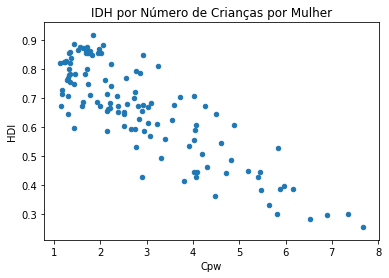

In [146]:
data.plot.scatter(y="HDI", x = "Cpw", title="IDH por Número de Crianças por Mulher")

No gráfico é possível observar que, em geral, quanto maior a quantidade de filhos por mulher em um país, menor é o IDH. Esse fenômeno é muito estudado quando se fala de pirâmide etária.

Quando um país tem uma taxa de natalidade muito alta, o IDH dele acaba ficando menor pelo fato de que, a longo prazo acaba ocorrendo uma superpopulação, e uma sobrecarga na população econômicamente ativa do país. 

O contrário também é real. Quando um país tem um alto IDH, o ensino e saúde dele são de nível mais alto, tendo assim, uma grande sabedoria sobre gravidez indesejada, e acesso a recursos contraceptivos, e uma diminuição na idéia de ter filhos para sustentar os pais. Diminuindo assim a natalidade. Portanto essas dois fatores acabam criando um ciclo.

# Gráfico 3 

Sabendo que o IDH é influenciado pela taxa de natalidade, e tem alguma relação com a igualdade de gêneros nas escolas, é bem rasoável imaginar que o número de crianças por mulher também é influenciado pelo número de mulheres que frequentam a escola. Isso pode ser observado no gráfico abaixo:

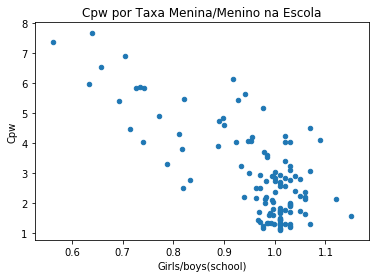

In [147]:
data.plot.scatter(y="Cpw", x = "Girls/boys(school)", title= "Cpw por Taxa Menina/Menino na Escola")

Apesar da taxa de erro já mencionada, o comportamento é como o esperado.

# Conclusão

Tendo em mente esses fatos, podemos imaginar que o IDH tem alguma relação não só com a diferença entre meninos e meninas nas escolas, mas também com o numero de filhos que cada mulher no país tem. 
Abaixo uma tabela de correlação entre os dados é gerada:

In [148]:
data.corr()

,HDI,Cpw,Girls/boys(school)
HDI,1.000000,-0.849050,0.704071
Cpw,-0.849050,1.000000,-0.736202
Girls/boys(school),0.704071,-0.736202,1.000000


Pode-se notar que todos eles tem um indicie de correlação elevado. Porem, ao analisar este fato mais profundamente, se percebe que os dados de meninas/meninos na escola tem menos correlação com os outros dados, e isto é pelo fato de que muitos paises possuem um valor perto de 1, formando uma tendencia para cima, que não segue a reta estabelecida ao usar este método. Sendo assim, mesmo com um indice de correlação diminuido, a relação entre IDH e igualdade de gêneros nas escolas é alta, considerando que está tendencia para cima próximo ao valor 1, só indica que o aglomerado de países com essa igualdade possuem um IDH elevado.

Ao aceitar que esses 3 dados tem relação, podemos fazer uma análise mais profunda do por que de isso acontecer. 
Como dito anteriormente, um IDH baixo faz com que mulheres tenham mais filhos, e vice versa, e em um país com IDH alto, mulheres acabam frequentando mais a escola pela melhor qualidade da educação. Mas se formos pensar nestes 3 dados como um só, é possível imaginar que em países com um IDH elevado, as mulheres vão querer, e poder, estudar, o que faz com que elas tenham menos tempo para cuidar das tarefas de casa, tendo menos filhos, que, como já havia sido discutido, ajuda a longo prazo à não sobrecarregar a população economicamente ativa, e assim elevar o IDH. 

Conclui-se, assim, que usamos 3 aspectos de um país que formam um ciclo, influenciando um ao outro, e que o inverso também é real. 

Para finalizar, ao utilizar um outro ano base, observa-se que as conclusões retiradas do ano de 2000 se repetem:

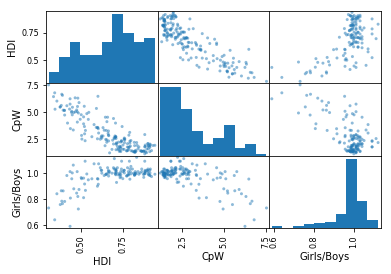

In [158]:
#pegando dados do ano 2008:
hdi2008=dadoshdi.loc[:,["geo", 2008]]
cpw2008=dadoscpw.loc[:,["geo", 2008]]
girls2008=dadosgirls.loc[:,["geo", 2008]]

#renomeando:
hdi2008 = hdi2008.set_index('geo')
cpw2008 = cpw2008.set_index('geo')
girls2008 = girls2008.set_index('geo')

#Juntando os 3 dados:
data2 = hdi2008.join(cpw2008, how='inner', lsuffix='_hdi', rsuffix='_cpw')
data2 = data2.join(girls2008, how='inner')

#renomeando as colunas:

data2["HDI"]=data2.pop("2008_hdi")
data2["CpW"]=data2.pop("2008_cpw")
data2["Girls/Boys"]=data2.pop(2008)

pd.plotting.scatter_matrix(data2);